In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing  dataset
population=pd.read_csv('Global population Trends.csv')

In [3]:
# Display of the first 5 Rows of the dataset
population.head()

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,-,-,-,55,63.0,37.342,7.027,5.129,49.4,-
1,Afghanistan,2018,"36,686,784","9,353,296","27,333,488",56,63.0,36.927,6.981,5.002,47.8,3.0
2,Afghanistan,2019,"37,769,499","9,727,157","28,042,342",58,64.0,36.466,6.791,4.87,46.3,3.0
3,Afghanistan,2020,"38,972,230","10,142,913","28,829,317",60,63.0,36.051,7.113,4.75,44.8,3.0
4,Afghanistan,2021,"40,099,462","10,551,772","29,547,690",-,62.0,35.842,7.344,4.643,43.4,3.0


In [4]:
type(population)

pandas.core.frame.DataFrame

In [5]:
#The Number of rows and columns of the dataset
population.shape
print("Number of rows",population.shape[0])
print("Number of columns",population.shape[1])

Number of rows 1073
Number of columns 12


In [6]:
#Basic Info about the dataset
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1073 non-null   object 
 1   Year                   1073 non-null   int64  
 2   Total Population       1073 non-null   object 
 3   Urban Population       1073 non-null   object 
 4   Rural Population       1073 non-null   object 
 5   Population Density     1073 non-null   object 
 6   Life Expectancy        1073 non-null   object 
 7   Birth Rate             1073 non-null   float64
 8   Death Rate             1073 non-null   float64
 9   Fertility Rate         1073 non-null   object 
 10  Infant Mortality Rate  1073 non-null   object 
 11  Growth Rate            1073 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 100.7+ KB


In [7]:
#Checking Missing Values In the dataset
population.isnull().values.any()

False

In [8]:
#Checking for duplicate data
population.duplicated().any()

False

In [9]:
#Basic statistics about the dataset
population.describe(include='all')

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
count,1073,1073.000000,1073,1073,1073,1073,1073,1073.000000,1073.000000,1073,1073,1073
unique,216,NaN,865,856,817,350,36,NaN,NaN,774,438,11
top,Afghanistan,NaN,-,-,-,-,74.0,NaN,NaN,-,-,1.0
freq,5,NaN,209,217,257,223,63,NaN,NaN,24,101,255
mean,NaN,2019.013048,NaN,NaN,NaN,NaN,NaN,18.801519,7.841907,NaN,NaN,NaN
std,NaN,1.410190,NaN,NaN,NaN,NaN,NaN,9.903449,2.973418,NaN,NaN,NaN
min,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,10.620000,6.067000,NaN,NaN,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,16.025000,7.396000,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,25.921000,9.313000,NaN,NaN,NaN


# Creating a new data frame for analysis

In [10]:
# List of columns  to select
selected_columns = [
    "Country",
    "Year",
    "Total Population",
    "Life Expectancy",
    "Birth Rate",
    "Death Rate",
    "Fertility Rate",
    "Infant Mortality Rate",
    "Growth Rate"
]

# Use .loc[]  selection of desired columns for all countries
Data = population.loc[:, selected_columns]


print(Data)


          Country  Year Total Population Life Expectancy  Birth Rate  \
0     Afghanistan  2017                -            63.0      37.342   
1     Afghanistan  2018       36,686,784            63.0      36.927   
2     Afghanistan  2019       37,769,499            64.0      36.466   
3     Afghanistan  2020       38,972,230            63.0      36.051   
4     Afghanistan  2021       40,099,462            62.0      35.842   
...           ...   ...              ...             ...         ...   
1068     Zimbabwe  2017                -            61.0      32.516   
1069     Zimbabwe  2018       15,052,184            61.0      32.074   
1070     Zimbabwe  2019       15,354,608            61.0      31.518   
1071     Zimbabwe  2020       15,669,666            61.0      31.009   
1072     Zimbabwe  2021       15,993,524            59.0      30.537   

      Death Rate Fertility Rate Infant Mortality Rate Growth Rate  
0          7.027          5.129                  49.4           -  

In [11]:
Data.shape
print("Number of rows",Data.shape[0])
print("Number of columns",Data.shape[1])

Number of rows 1073
Number of columns 9


In [12]:
Data.dtypes

Country                   object
Year                       int64
Total Population          object
Life Expectancy           object
Birth Rate               float64
Death Rate               float64
Fertility Rate            object
Infant Mortality Rate     object
Growth Rate               object
dtype: object

# Selection of specific country to analyze data

In [13]:
country_data = Data[Data['Country'] == 'Kenya']

In [14]:
country_data

,Country,Year,Total Population,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
491,Kenya,2017,-,62.0,29.755,7.294,3.643,31.6,-
492,Kenya,2018,"49,953,304",63.0,29.180,7.305,3.58,30.6,2.0
493,Kenya,2019,"50,951,450",63.0,28.460,7.290,3.469,29.7,2.0
494,Kenya,2020,"51,985,780",63.0,27.998,7.456,3.397,29.0,2.0
495,Kenya,2021,"53,005,614",61.0,27.685,8.056,3.335,28.0,2.0


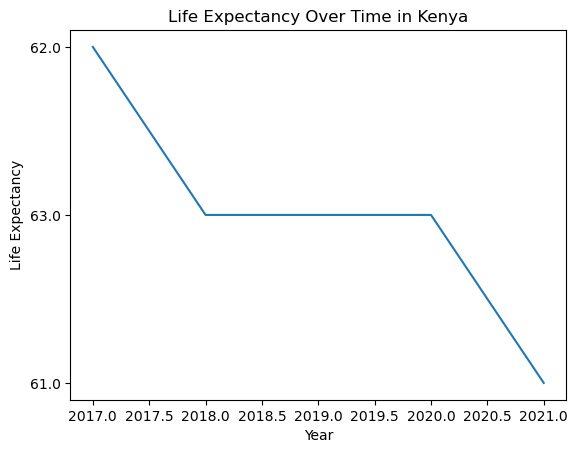

In [15]:
sns.lineplot(data=country_data, x='Year', y='Life Expectancy')
plt.title('Life Expectancy Over Time in Kenya')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

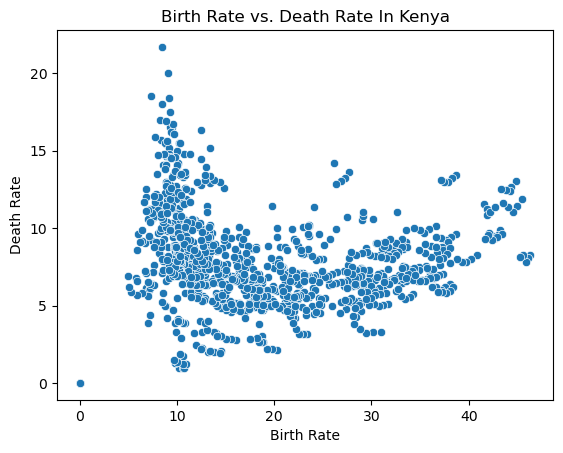

In [16]:
sns.scatterplot(data=Data, x='Birth Rate', y='Death Rate')
plt.title('Birth Rate vs. Death Rate In Kenya')
plt.xlabel('Birth Rate')
plt.ylabel('Death Rate')
plt.show()

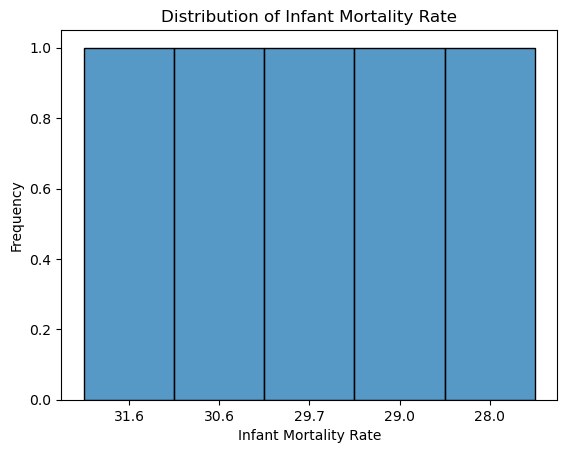

In [17]:
sns.histplot(data=country_data, x='Infant Mortality Rate')
plt.title('Distribution of Infant Mortality Rate')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Frequency')
plt.show()


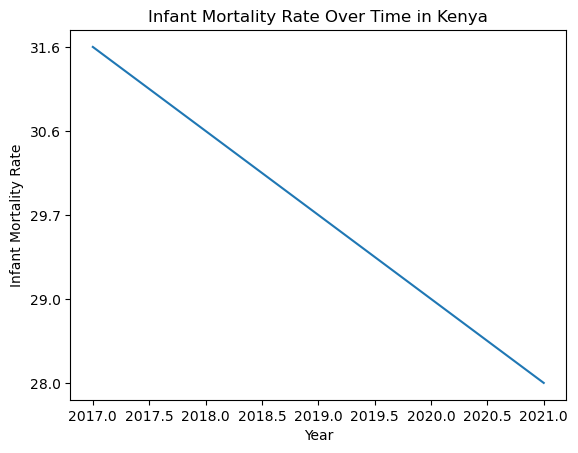

In [21]:
sns.lineplot(data=country_data, x='Year', y='Infant Mortality Rate')
plt.title('Infant Mortality Rate Over Time in Kenya')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.show()

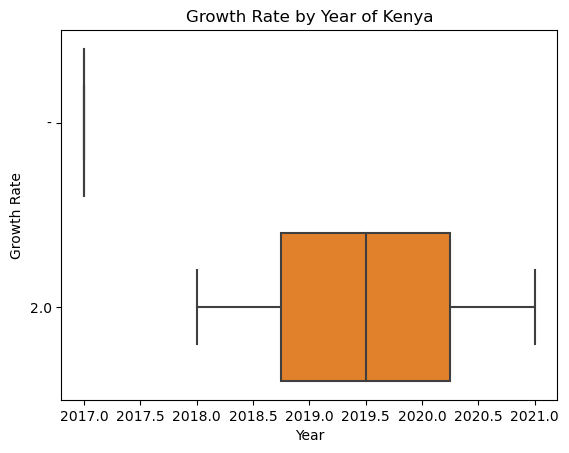

In [18]:
sns.boxplot(data=country_data, x='Year', y='Growth Rate')
plt.title('Growth Rate by Year of Kenya')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()

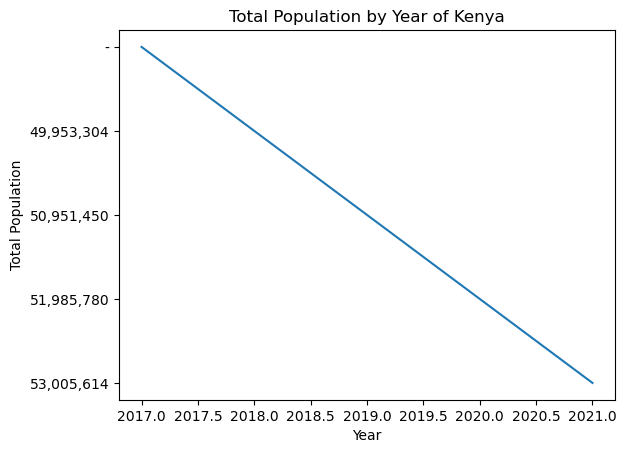

In [19]:
sns.lineplot(data=country_data, x='Year', y='Total Population')
plt.title('Total Population by Year of Kenya')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.show()

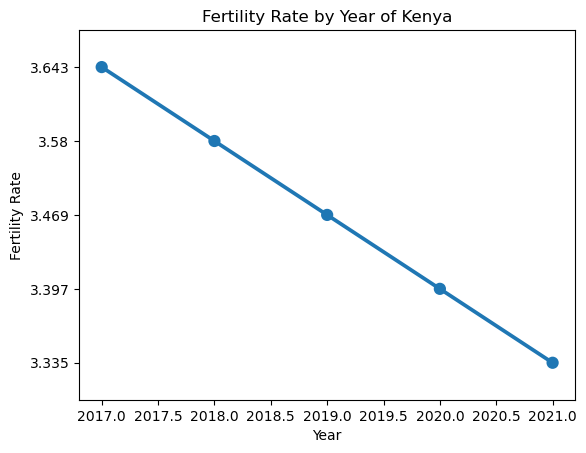

In [20]:
sns.pointplot(data=country_data, x='Year', y='Fertility Rate')
plt.title('Fertility Rate by Year of Kenya')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.show()